In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
import os
import torch
from sklearn.preprocessing import LabelEncoder

class DogbreedDataset(Dataset):
    def __init__(self, root_dir, csv_file, transform=None):
        self.root_dir = root_dir
        self.data = pd.read_csv(csv_file)
        self.transform = transform

        # Encode string labels to integers
        self.label_encoder = LabelEncoder()
        self.data['label_encoded'] = self.label_encoder.fit_transform(self.data['label'])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.data.iloc[idx]['filename'])
        image = Image.open(img_path).convert('RGB')
        label = self.data.iloc[idx]['label_encoded']

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label).long()

In [ ]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Transforms (you can adjust or use augmentations for training)
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Paths
train_dir = '/kaggle/input/dog-breed-data/dog_breed_competition/train'
val_dir = '/kaggle/input/dog-breed-data/dog_breed_competition/train'
train_csv = '/kaggle/input/dog-breed-data/dog_breed_competition/train.csv'
val_csv = '/kaggle/input/dog-breed-data/dog_breed_competition/val.csv'

# Datasets
train_dataset = DogbreedDataset(root_dir=train_dir, csv_file=train_csv, transform=transform_train)
val_dataset = DogbreedDataset(root_dir=val_dir, csv_file=val_csv, transform=transform_val)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
model1 = models.resnet34(weights = 'DEFAULT')

In [ ]:
model1

In [ ]:
from torchinfo import summary

In [ ]:
summary(model1)

In [ ]:
for params in model1.parameters():
    params.requires_grad = False

In [ ]:
for params in model1.fc.parameters():
    params.required_grad = True

In [ ]:
for params in model1.avgpool.parameters():
    params.required_grad = True

In [ ]:
for params in model1.layer4.parameters():
    params.required_grad = True

In [ ]:
import os
import pandas as pd

def generate_csv_from_folder(root_dir, output_csv):
    entries = []
    for breed in os.listdir(root_dir):
        breed_dir = os.path.join(root_dir, breed)
        if os.path.isdir(breed_dir):
            for img_name in os.listdir(breed_dir):
                if img_name.endswith(('.jpg', '.png', '.jpeg')):
                    entries.append([f"{breed}/{img_name}", breed])
    df = pd.DataFrame(entries, columns=['filename', 'label'])
    df.to_csv(output_csv, index=False)
    print(f"Saved: {output_csv} with {len(df)} entries")

# Example usage:
# Example usage:
generate_csv_from_folder(
    '/kaggle/input/dog-breed-data/dog_breed_competition/train',
    '/kaggle/working/train.csv'
)

generate_csv_from_folder(
    '/kaggle/input/dog-breed-data/dog_breed_competition/val',
    '/kaggle/working/val.csv'
)

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class DogbreedDataset(Dataset):
    def __init__(self, root_dir, csv_file, transform=None):
        self.root_dir = root_dir
        self.data = pd.read_csv(csv_file)
        self.transform = transform

        # Encode string labels to integers
        self.label_encoder = LabelEncoder()
        self.data['label_encoded'] = self.label_encoder.fit_transform(self.data['label'])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.data.iloc[idx]['filename'])
        image = Image.open(img_path).convert('RGB')
        label = self.data.iloc[idx]['label_encoded']

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label).long()

def generate_csv_from_folder(root_dir, output_csv):
    entries = []
    for breed in os.listdir(root_dir):
        breed_dir = os.path.join(root_dir, breed)
        if os.path.isdir(breed_dir):
            for img_name in os.listdir(breed_dir):
                if img_name.endswith(('.jpg', '.png', '.jpeg')):
                    entries.append([f"{breed}/{img_name}", breed])
    df = pd.DataFrame(entries, columns=['filename', 'label'])
    df.to_csv(output_csv, index=False)
    print(f"Saved: {output_csv} with {len(df)} entries")

# Generate CSV files
generate_csv_from_folder(
    '/kaggle/input/dog-breed-data/dog_breed_competition/train',
    '/kaggle/working/train.csv'
)

generate_csv_from_folder(
    '/kaggle/input/dog-breed-data/dog_breed_competition/val',
    '/kaggle/working/val.csv'
)

# Hyperparameters
BATCH_SIZE = 32
EPOCHS = 5
LR = 1e-4
NUM_CLASSES = 157

# Transforms
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Paths (CORRECTED)
train_dir = '/kaggle/input/dog-breed-data/dog_breed_competition/train'
val_dir = '/kaggle/input/dog-breed-data/dog_breed_competition/val'  # Fixed: should be 'val'
train_csv = '/kaggle/working/train.csv'
val_csv = '/kaggle/working/val.csv'

# Datasets and Loaders
train_dataset = DogbreedDataset(root_dir=train_dir, csv_file=train_csv, transform=transform_train)
val_dataset = DogbreedDataset(root_dir=val_dir, csv_file=val_csv, transform=transform_val)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Load pretrained ResNet model (CORRECTED)
model = models.resnet50(weights='DEFAULT')  # Fixed: use weights instead of pretrained

# CORRECTED: Proper transfer learning setup
# Freeze all parameters first
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the layers you want to fine-tune
for param in model.fc.parameters():
    param.requires_grad = True

for param in model.avgpool.parameters():
    param.requires_grad = True

for param in model.layer4.parameters():
    param.requires_grad = True

# Modify the final classification layer
model.fc = nn.Linear(model.fc.in_features, NUM_CLASSES)

# Move model to device
model = model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=LR)

# Training Loop
def train(model, loader, optimizer, criterion, epoch):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for batch_idx, (images, labels) in enumerate(loader):
        images, labels = images.to(device), labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Stats
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print progress every 100 batches
        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch}] Batch [{batch_idx}/{len(loader)}] Loss: {loss.item():.4f}')

    acc = 100 * correct / total
    print(f"Epoch [{epoch}] Training Loss: {running_loss/len(loader):.4f}, Accuracy: {acc:.2f}%")

def validate(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print(f"Validation Loss: {running_loss/len(loader):.4f}, Accuracy: {acc:.2f}%\n")
    return acc

# Run Training
if __name__ == '__main__':
    best_acc = 0.0
    for epoch in range(1, EPOCHS + 1):
        train(model, train_loader, optimizer, criterion, epoch)
        val_acc = validate(model, val_loader, criterion)
        
        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_resnet_dogbreed_model.pth')
            print(f"New best model saved with accuracy: {best_acc:.2f}%")

    print(f"Training completed. Best validation accuracy: {best_acc:.2f}%")

Using device: cuda
Saved: /kaggle/working/train.csv with 12186 entries
Saved: /kaggle/working/val.csv with 2616 entries
Epoch [1] Batch [0/381] Loss: 5.0817
Epoch [1] Batch [100/381] Loss: 2.7490
Epoch [1] Batch [200/381] Loss: 1.0864
Epoch [1] Batch [300/381] Loss: 1.0377
Epoch [1] Training Loss: 2.1178, Accuracy: 58.76%
Validation Loss: 6.5264, Accuracy: 25.23%

New best model saved with accuracy: 25.23%
Epoch [2] Batch [0/381] Loss: 0.5651
Epoch [2] Batch [100/381] Loss: 0.2809
Epoch [2] Batch [200/381] Loss: 0.4487
Epoch [2] Batch [300/381] Loss: 0.7599


KeyboardInterrupt: 

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import cv2

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class DogbreedDataset(Dataset):
    def __init__(self, root_dir, csv_file, transform=None):
        self.root_dir = root_dir
        self.data = pd.read_csv(csv_file)
        self.transform = transform

        # Encode string labels to integers
        self.label_encoder = LabelEncoder()
        self.data['label_encoded'] = self.label_encoder.fit_transform(self.data['label'])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.data.iloc[idx]['filename'])
        image = Image.open(img_path).convert('RGB')
        label = self.data.iloc[idx]['label_encoded']

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label).long()

def generate_csv_from_folder(root_dir, output_csv):
    entries = []
    for breed in os.listdir(root_dir):
        breed_dir = os.path.join(root_dir, breed)
        if os.path.isdir(breed_dir):
            for img_name in os.listdir(breed_dir):
                if img_name.endswith(('.jpg', '.png', '.jpeg')):
                    entries.append([f"{breed}/{img_name}", breed])
    df = pd.DataFrame(entries, columns=['filename', 'label'])
    df.to_csv(output_csv, index=False)
    print(f"Saved: {output_csv} with {len(df)} entries")

# Grad-CAM Implementation
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        
        # Register hooks
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_backward_hook(self.save_gradient)
    
    def save_activation(self, module, input, output):
        self.activations = output
    
    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]
    
    def generate_cam(self, input_tensor, class_idx=None):
        # Forward pass
        output = self.model(input_tensor)
        
        # Get the class with highest score if not specified
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()
        
        # Backward pass
        self.model.zero_grad()
        output[0, class_idx].backward(retain_graph=True)
        
        # Generate CAM
        gradients = self.gradients.detach()
        activations = self.activations.detach()
        
        # Pool gradients across spatial dimensions
        weights = gradients.mean(dim=(2, 3), keepdim=True)
        
        # Weight the activations
        cam = (weights * activations).sum(dim=1, keepdim=True)
        
        # Apply ReLU
        cam = torch.relu(cam)
        
        # Normalize
        cam = cam / cam.max()
        
        return cam.squeeze().cpu().numpy(), class_idx

def visualize_gradcam(original_image, cam, alpha=0.4):
    """
    Overlay Grad-CAM on original image
    """
    # Resize CAM to match image size
    cam_resized = cv2.resize(cam, (original_image.shape[1], original_image.shape[0]))
    
    # Normalize CAM to 0-255
    cam_normalized = np.uint8(255 * cam_resized)
    
    # Apply colormap
    heatmap = cv2.applyColorMap(cam_normalized, cv2.COLORMAP_JET)
    
    # Convert BGR to RGB
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    
    # Overlay heatmap on original image
    superimposed = heatmap * alpha + original_image * (1 - alpha)
    superimposed = np.clip(superimposed, 0, 255).astype(np.uint8)
    
    return superimposed, heatmap

def predict_and_visualize(model, image_path, transform, class_names, gradcam):
    """
    Predict class and generate Grad-CAM visualization
    """
    # Load and preprocess image
    original_image = Image.open(image_path).convert('RGB')
    original_array = np.array(original_image)
    
    # Transform for model input
    input_tensor = transform(original_image).unsqueeze(0).to(device)
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = output.argmax(dim=1).item()
        confidence = probabilities[0, predicted_class].item()
    
    # Generate Grad-CAM
    cam, class_idx = gradcam.generate_cam(input_tensor, predicted_class)
    
    # Visualize
    superimposed, heatmap = visualize_gradcam(original_array, cam)
    
    # Plot results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original image
    axes[0].imshow(original_array)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Grad-CAM heatmap
    axes[1].imshow(heatmap)
    axes[1].set_title('Grad-CAM Heatmap')
    axes[1].axis('off')
    
    # Superimposed
    axes[2].imshow(superimposed)
    axes[2].set_title(f'Prediction: {class_names[predicted_class]}\nConfidence: {confidence:.3f}')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return predicted_class, confidence

# Generate CSV files
generate_csv_from_folder(
    '/kaggle/input/dog-breed-data/dog_breed_competition/train',
    '/kaggle/working/train.csv'
)

generate_csv_from_folder(
    '/kaggle/input/dog-breed-data/dog_breed_competition/val',
    '/kaggle/working/val.csv'
)

# Hyperparameters
BATCH_SIZE = 32
EPOCHS = 10
LR = 1e-4
NUM_CLASSES = 157

# Transforms
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Transform for visualization (without normalization)
transform_vis = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Paths
train_dir = '/kaggle/input/dog-breed-data/dog_breed_competition/train'
val_dir = '/kaggle/input/dog-breed-data/dog_breed_competition/val'
train_csv = '/kaggle/working/train.csv'
val_csv = '/kaggle/working/val.csv'

# Datasets and Loaders
train_dataset = DogbreedDataset(root_dir=train_dir, csv_file=train_csv, transform=transform_train)
val_dataset = DogbreedDataset(root_dir=val_dir, csv_file=val_csv, transform=transform_val)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Load pretrained ResNet model (FROZEN - no unfreezing)
model = models.resnet50(weights='DEFAULT')

# Freeze ALL parameters (pretrained weights only)
for param in model.parameters():
    param.requires_grad = False

# Only modify the final classification layer
model.fc = nn.Linear(model.fc.in_features, NUM_CLASSES)

# Move model to device
model = model.to(device)

# Loss and Optimizer (only for the final layer)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=LR)

# Training Loop
def train(model, loader, optimizer, criterion, epoch):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for batch_idx, (images, labels) in enumerate(loader):
        images, labels = images.to(device), labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Stats
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch}] Batch [{batch_idx}/{len(loader)}] Loss: {loss.item():.4f}')

    acc = 100 * correct / total
    print(f"Epoch [{epoch}] Training Loss: {running_loss/len(loader):.4f}, Accuracy: {acc:.2f}%")

def validate(model, loader, criterion):
    model.eval()
    running_loss = 0.0
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = 100 * correct / total
    print(f"Validation Loss: {running_loss/len(loader):.4f}, Accuracy: {acc:.2f}%\n")
    return acc

# Run Training
if __name__ == '__main__':
    # Get class names from dataset
    class_names = train_dataset.label_encoder.classes_
    
    best_acc = 0.0
    for epoch in range(1, EPOCHS + 1):
        train(model, train_loader, optimizer, criterion, epoch)
        val_acc = validate(model, val_loader, criterion)
        
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'best_pretrained_dogbreed_model.pth')
            print(f"New best model saved with accuracy: {best_acc:.2f}%")

    print(f"Training completed. Best validation accuracy: {best_acc:.2f}%")
    
    # Initialize Grad-CAM
    # Target layer: last convolutional layer before avg pooling
    target_layer = model.layer4[-1].conv2  # For ResNet50
    gradcam = GradCAM(model, target_layer)
    
    # Example usage for Grad-CAM visualization
    print("\n--- Grad-CAM Visualization ---")
    print("To use Grad-CAM on an image, call:")
    print("predict_and_visualize(model, '/kaggle/input/dog-breed-data/dog_breed_competition/train/newfoundland/newfoundland_00000.jpg', transform_vis, class_names, gradcam)")
    
    # Example with a sample image from validation set
    sample_image_path = os.path.join(val_dir, val_dataset.data.iloc[0]['filename'])
    if os.path.exists(sample_image_path):
        print(f"\nGenerating Grad-CAM for sample image: {sample_image_path}")
        predicted_class, confidence = predict_and_visualize(
            model, sample_image_path, transform_vis, class_names, gradcam
        )
        print(f"Predicted: {class_names[predicted_class]} (Confidence: {confidence:.3f})")

# Function to use after training for any image
def analyze_image(image_path):
    """
    Analyze any image with the trained model and show Grad-CAM
    """
    return predict_and_visualize(model, image_path, transform_vis, class_names, gradcam)

Using device: cuda
Saved: /kaggle/working/train.csv with 12186 entries
Saved: /kaggle/working/val.csv with 2616 entries
Epoch [1] Batch [0/381] Loss: 5.0920


KeyboardInterrupt: 

Using device: cuda
Loading pretrained ResNet50 model...
Model loaded successfully!
Available functions:
1. analyze_image(image_path) - Analyze image with Grad-CAM
2. get_top_k_predictions(model, image_path, transform, imagenet_classes, k=5) - Get top-k predictions

PRETRAINED MODEL READY FOR INFERENCE

To analyze an image, use:
analyze_image('/path/to/your/image.jpg')

Example:
analyze_image('/kaggle/input/dog-breed-data/dog_breed_competition/train/pitbull/pitbull_00000.jpg')

Analyzing sample image: /kaggle/input/dog-breed-data/dog_breed_competition/train/pitbull/pitbull_00000.jpg


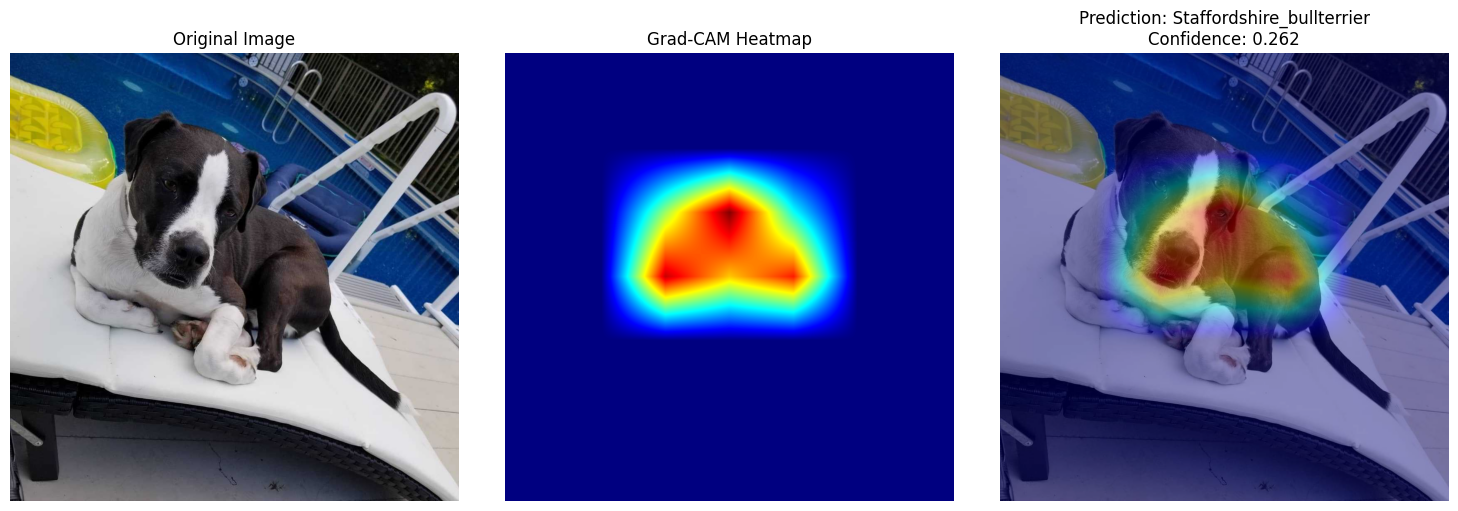


Top-5 predictions for /kaggle/input/dog-breed-data/dog_breed_competition/train/pitbull/pitbull_00000.jpg:
--------------------------------------------------
1. Staffordshire_bullterrier: 0.262
2. American_Staffordshire_terrier: 0.190
3. Boston_bull: 0.021
4. class_428: 0.011
5. class_450: 0.009


In [49]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Grad-CAM Implementation
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        
        # Register hooks
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_backward_hook(self.save_gradient)
    
    def save_activation(self, module, input, output):
        self.activations = output
    
    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]
    
    def generate_cam(self, input_tensor, class_idx=None):
        # Forward pass
        output = self.model(input_tensor)
        
        # Get the class with highest score if not specified
        if class_idx is None:
            class_idx = output.argmax(dim=1).item()
        
        # Backward pass
        self.model.zero_grad()
        output[0, class_idx].backward(retain_graph=True)
        
        # Generate CAM
        gradients = self.gradients.detach()
        activations = self.activations.detach()
        
        # Pool gradients across spatial dimensions
        weights = gradients.mean(dim=(2, 3), keepdim=True)
        
        # Weight the activations
        cam = (weights * activations).sum(dim=1, keepdim=True)
        
        # Apply ReLU
        cam = torch.relu(cam)
        
        # Normalize
        cam = cam / cam.max()
        
        return cam.squeeze().cpu().numpy(), class_idx

def visualize_gradcam(original_image, cam, alpha=0.4):
    """
    Overlay Grad-CAM on original image
    """
    # Resize CAM to match image size
    cam_resized = cv2.resize(cam, (original_image.shape[1], original_image.shape[0]))
    
    # Normalize CAM to 0-255
    cam_normalized = np.uint8(255 * cam_resized)
    
    # Apply colormap
    heatmap = cv2.applyColorMap(cam_normalized, cv2.COLORMAP_JET)
    
    # Convert BGR to RGB
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    
    # Overlay heatmap on original image
    superimposed = heatmap * alpha + original_image * (1 - alpha)
    superimposed = np.clip(superimposed, 0, 255).astype(np.uint8)
    
    return superimposed, heatmap

def predict_and_visualize(model, image_path, transform, class_names, gradcam):
    """
    Predict class and generate Grad-CAM visualization
    """
    # Load and preprocess image
    original_image = Image.open(image_path).convert('RGB')
    original_array = np.array(original_image)
    
    # Transform for model input
    input_tensor = transform(original_image).unsqueeze(0).to(device)
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = output.argmax(dim=1).item()
        confidence = probabilities[0, predicted_class].item()
    
    # Generate Grad-CAM
    cam, class_idx = gradcam.generate_cam(input_tensor, predicted_class)
    
    # Visualize
    superimposed, heatmap = visualize_gradcam(original_array, cam)
    
    # Plot results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original image
    axes[0].imshow(original_array)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Grad-CAM heatmap
    axes[1].imshow(heatmap)
    axes[1].set_title('Grad-CAM Heatmap')
    axes[1].axis('off')
    
    # Superimposed
    axes[2].imshow(superimposed)
    axes[2].set_title(f'Prediction: {class_names[predicted_class]}\nConfidence: {confidence:.3f}')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return predicted_class, confidence

def get_top_k_predictions(model, image_path, transform, class_names, k=5):
    """
    Get top-k predictions for an image
    """
    # Load and preprocess image
    original_image = Image.open(image_path).convert('RGB')
    input_tensor = transform(original_image).unsqueeze(0).to(device)
    
    # Make prediction
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        probabilities = torch.softmax(output, dim=1)
        top_k_probs, top_k_indices = torch.topk(probabilities, k)
    
    # Print top-k predictions
    print(f"\nTop-{k} predictions for {image_path}:")
    print("-" * 50)
    for i in range(k):
        class_idx = top_k_indices[0][i].item()
        prob = top_k_probs[0][i].item()
        print(f"{i+1}. {class_names[class_idx]}: {prob:.3f}")
    
    return top_k_indices[0].cpu().numpy(), top_k_probs[0].cpu().numpy()

# Load pretrained ResNet model (NO TRAINING)
print("Loading pretrained ResNet50 model...")
model = models.resnet50(weights='DEFAULT')

# Set model to evaluation mode
model.eval()
model = model.to(device)

# ImageNet class names (1000 classes)
# For a quick demo, we'll use a subset of common classes
imagenet_classes = [
    'tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead_shark',
    'electric_ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch',
    'house_finch', 'junco', 'indigo_bunting', 'robin', 'bulbul', 'jay', 'magpie',
    'chickadee', 'water_ouzel', 'kite', 'bald_eagle', 'vulture', 'great_grey_owl',
    'European_fire_salamander', 'common_newt', 'eft', 'spotted_salamander',
    'axolotl', 'bullfrog', 'tree_frog', 'tailed_frog', 'loggerhead', 'leatherback_turtle',
    'mud_turtle', 'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana',
    'American_chameleon', 'whiptail', 'agama', 'frilled_lizard', 'alligator_lizard',
    'Gila_monster', 'green_lizard', 'African_chameleon', 'Komodo_dragon',
    'African_crocodile', 'American_alligator', 'triceratops', 'thunder_snake',
    'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake', 'garter_snake',
    'water_snake', 'vine_snake', 'night_snake', 'boa_constrictor', 'rock_python',
    'Indian_cobra', 'green_mamba', 'sea_snake', 'horned_viper', 'diamondback',
    'sidewinder', 'trilobite', 'harvestman', 'scorpion', 'black_and_gold_garden_spider',
    'barn_spider', 'garden_spider', 'black_widow', 'tarantula', 'wolf_spider',
    'tick', 'centipede', 'black_grouse', 'ptarmigan', 'ruffed_grouse', 'prairie_chicken',
    'peacock', 'quail', 'partridge', 'African_grey', 'macaw', 'sulphur-crested_cockatoo',
    'lorikeet', 'coucal', 'bee_eater', 'hornbill', 'hummingbird', 'jacamar', 'toucan',
    'drake', 'red-breasted_merganser', 'goose', 'black_swan', 'tusker', 'echidna',
    'platypus', 'wallaby', 'koala', 'wombat', 'jellyfish', 'sea_anemone',
    'brain_coral', 'flatworm', 'nematode', 'conch', 'snail', 'slug', 'sea_slug',
    'chiton', 'chambered_nautilus', 'Dungeness_crab', 'rock_crab', 'fiddler_crab',
    'king_crab', 'American_lobster', 'spiny_lobster', 'crayfish', 'hermit_crab',
    'isopod', 'white_stork', 'black_stork', 'spoonbill', 'flamingo', 'little_blue_heron',
    'American_egret', 'bittern', 'crane', 'limpkin', 'European_gallinule', 'American_coot',
    'bustard', 'ruddy_turnstone', 'red-backed_sandpiper', 'redshank', 'dowitcher',
    'oystercatcher', 'pelican', 'king_penguin', 'albatross', 'grey_whale', 'killer_whale',
    'dugong', 'sea_lion', 'Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese',
    'Shih-Tzu', 'Blenheim_spaniel', 'papillon', 'toy_terrier', 'Rhodesian_ridgeback',
    'Afghan_hound', 'basset', 'beagle', 'bloodhound', 'bluetick', 'black-and-tan_coonhound',
    'Walker_hound', 'English_foxhound', 'redbone', 'borzoi', 'Irish_wolfhound',
    'Italian_greyhound', 'whippet', 'Ibizan_hound', 'Norwegian_elkhound', 'otterhound',
    'Saluki', 'Scottish_deerhound', 'Weimaraner', 'Staffordshire_bullterrier',
    'American_Staffordshire_terrier', 'Bedlington_terrier', 'Border_terrier',
    'Kerry_blue_terrier', 'Irish_terrier', 'Norfolk_terrier', 'Norwich_terrier',
    'Yorkshire_terrier', 'wire-haired_fox_terrier', 'Lakeland_terrier', 'Sealyham_terrier',
    'Airedale', 'cairn', 'Australian_terrier', 'Dandie_Dinmont', 'Boston_bull',
    'miniature_schnauzer', 'giant_schnauzer', 'standard_schnauzer', 'Scotch_terrier',
    'Tibetan_terrier', 'silky_terrier', 'soft-coated_wheaten_terrier', 'West_Highland_white_terrier',
    'Lhasa', 'flat-coated_retriever', 'curly-coated_retriever', 'golden_retriever',
    'Labrador_retriever', 'Chesapeake_Bay_retriever', 'German_short-haired_pointer',
    'vizsla', 'English_setter', 'Irish_setter', 'Gordon_setter', 'Brittany_spaniel',
    'clumber', 'English_springer', 'Welsh_springer_spaniel', 'cocker_spaniel',
    'Sussex_spaniel', 'Irish_water_spaniel', 'kuvasz', 'schipperke', 'groenendael',
    'malinois', 'briard', 'kelpie', 'komondor', 'Old_English_sheepdog', 'Shetland_sheepdog',
    'collie', 'Border_collie', 'Bouvier_des_Flandres', 'Rottweiler', 'German_shepherd',
    'Doberman', 'miniature_pinscher', 'Greater_Swiss_Mountain_dog', 'Bernese_mountain_dog',
    'Appenzeller', 'EntleBucher', 'boxer', 'bull_mastiff', 'Tibetan_mastiff',
    'French_bulldog', 'Great_Dane', 'Saint_Bernard', 'Eskimo_dog', 'malamute',
    'Siberian_husky', 'affenpinscher', 'basenji', 'pug', 'Leonberg', 'Newfoundland',
    'Great_Pyrenees', 'Samoyed', 'Pomeranian', 'chow', 'keeshond', 'Brabancon_griffon',
    'Pembroke', 'Cardigan', 'toy_poodle', 'miniature_poodle', 'standard_poodle',
    'Mexican_hairless', 'timber_wolf', 'white_wolf', 'red_wolf', 'coyote', 'dingo',
    'dhole', 'African_hunting_dog', 'hyena', 'red_fox', 'kit_fox', 'Arctic_fox',
    'grey_fox', 'tabby', 'tiger_cat', 'Persian_cat', 'Siamese_cat', 'Egyptian_cat',
    'cougar', 'lynx', 'leopard', 'snow_leopard', 'jaguar', 'lion', 'tiger', 'cheetah'
]

# Add more classes to reach 1000 (truncated for brevity)
# In practice, you'd load the full ImageNet class names from a file
while len(imagenet_classes) < 1000:
    imagenet_classes.append(f'class_{len(imagenet_classes)}')

# Transform for model input
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Initialize Grad-CAM
# Target layer: last convolutional layer before avg pooling
target_layer = model.layer4[-1].conv2  # For ResNet50
gradcam = GradCAM(model, target_layer)

print("Model loaded successfully!")
print("Available functions:")
print("1. analyze_image(image_path) - Analyze image with Grad-CAM")
print("2. get_top_k_predictions(model, image_path, transform, imagenet_classes, k=5) - Get top-k predictions")

# Main function to analyze any image
def analyze_image(image_path):
    """
    Analyze any image with the pretrained model and show Grad-CAM
    """
    try:
        predicted_class, confidence = predict_and_visualize(
            model, image_path, transform, imagenet_classes, gradcam
        )
        
        # Also show top-5 predictions
        get_top_k_predictions(model, image_path, transform, imagenet_classes, k=5)
        
        return predicted_class, confidence
        
    except Exception as e:
        print(f"Error analyzing image: {e}")
        return None, None

# Example usage
print("\n" + "="*60)
print("PRETRAINED MODEL READY FOR INFERENCE")
print("="*60)
print("\nTo analyze an image, use:")
print("analyze_image('/path/to/your/image.jpg')")
print("\nExample:")
print("analyze_image('/kaggle/input/dog-breed-data/dog_breed_competition/train/pitbull/pitbull_00000.jpg')")

# If you have a sample image, uncomment and modify the path below:
sample_image_path = '/kaggle/input/dog-breed-data/dog_breed_competition/train/pitbull/pitbull_00000.jpg'
if os.path.exists(sample_image_path):
    print(f"\nAnalyzing sample image: {sample_image_path}")
    analyze_image(sample_image_path)